In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.optimize as opt
%load_ext autoreload
%autoreload 2

sys.path.append("../")
from training.util_prediction import get_coordinate_list

## import data

In [4]:
dataset = "../data/spots_synt_harder_e4cd83b6.npz"
with np.load(dataset, allow_pickle=True) as data:
        train_x = data["x_train"]
        valid_x = data["x_valid"]
        test_x = data["x_test"]
        train_y = data["y_train"]
        valid_y = data["y_valid"]
        test_y = data["y_test"]

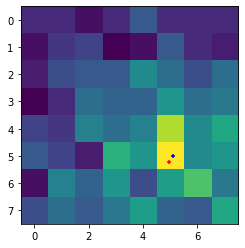

In [73]:
idx = 3
init = 116
init_1 = 116
size = 8
image = train_x[idx]
image = image[init:(init+size),init_1:(init_1+size)]
mask = train_y[idx]
mask = mask[int(init/4):int((init+size)/4),int(init_1/4):int((init_1+size)/4)]

plt.imshow(image)
coordList = get_coordinate_list(mask,512,128)
plt.scatter(coordList[...,0],coordList[...,1],marker="+",color='r',s=20)
plt.scatter(x0,y0,marker="+",color='b',s=20)


In [70]:
# define Gaussian
def twoD_Gauss(xy,amplitude,x0,y0,sigma_xy,offset):
    x,y = xy
    x0=float(x0)
    y0=float(y0)
    g = offset + amplitude*np.exp(-(((x-x0)**(2)/(2*sigma_xy**(2))) + ((y-y0)**(2)/(2*sigma_xy**(2)))))
    return g


In [71]:
x = np.arange(0, image.shape[1], 1)
y = np.arange(0, image.shape[0], 1)
xx, yy = np.meshgrid(x, y)

# Guess intial parameters
x0 = int(image.shape[0]//2) # Middle of the image
y0 = int(image.shape[1]//2) # Middle of the image
sigma = max(*image.shape) * 0.1 # 10% of the image
H = np.max(image)/2 # Maximum value of the image
initial_guess = [H, x0, y0, sigma, 0]

lower = [0, 0, 0, 0, 0]
upper = [np.max(image), image.shape[0], image.shape[1], np.inf, np.max(image)]
bounds = [lower, upper]

popt, pcov = opt.curve_fit(twoD_Gauss, (xx.ravel(),yy.ravel()), image.ravel(), p0 = initial_guess, bounds=bounds)

In [72]:
amp, x0, y0, sigma, offset = popt


In [44]:
xx.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5,
       6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3,
       4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7])

In [64]:
x0

1.4371590744888123

In [52]:
popt

array([9.51738009e-04, 7.99989605e+00, 6.84980024e+00, 1.79231760e-02,
       1.51960790e-02])

In [54]:
int(init/4+1):int((init+size+size)/4)

SyntaxError: illegal target for annotation (<ipython-input-54-f8a7310bf5ed>, line 1)